In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq
from scipy.stats import zscore
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, spearmanr
import nibabel as nib
from scipy.stats import linregress
import pickle

BERT_NSP_matrix = np.load('data/BERT_NSP_results.npy')
semantic_similarity_matrix = np.zeros((3,300,300))
for i in range(3):
    annotation_embedding = np.load(f'data/sentence_embedding_{i+1:02d}.npy')
    semantic_similarity_matrix[i,:,:] = np.corrcoef(annotation_embedding)

BERT_NSP_matrix_wo_similarity = np.zeros((3,300,300))
for i in range(3):
    semantic_similarity_vector = semantic_similarity_matrix[i,:,:].reshape(-1,1)
    NSP_vector = BERT_NSP_matrix[i,:,:].reshape(-1,1)

    X = np.concatenate([semantic_similarity_vector, np.ones(semantic_similarity_vector.shape)], axis=1)

    coef, residual, _, _ = lstsq(X, NSP_vector)
    nsp_vector_clean = NSP_vector - X.dot(coef)
    BERT_NSP_matrix_wo_similarity[i,:,:] = nsp_vector_clean.reshape((300,300))

BERT_NSP_matrix_wo_similarity = np.mean(BERT_NSP_matrix_wo_similarity, axis=0)
BERT_NSP_matrix_wo_similarity_for_plotting = np.copy(BERT_NSP_matrix_wo_similarity)
BERT_NSP_matrix_wo_similarity_for_plotting[np.tril_indices(300)] = np.nan
BERT_NSP_matrix_wo_similarity = np.repeat(np.repeat(BERT_NSP_matrix_wo_similarity, 2, axis=0), 2, axis=1)

BERT_retrieval = np.zeros(600)
BERT_retrieval_target = np.zeros(600)
for i in range(1, 600):
    BERT_retrieval[i] = np.max(BERT_NSP_matrix_wo_similarity[:i,i]) #/ (i+1)
    BERT_retrieval_target[i] = np.argmax(BERT_NSP_matrix_wo_similarity[:i,i]) #/ (i+1)

from nltools.external import glover_hrf
hrf_weight = glover_hrf(tr=1, oversampling=1)
BERT_retrieval = np.convolve(BERT_retrieval, hrf_weight)[:610]

97 96
98 96
99 98
100 98
101 96
102 96
103 98
104 97
105 97
106 102
107 102
108 106
109 101
110 102
111 102
112 102
113 108
114 102


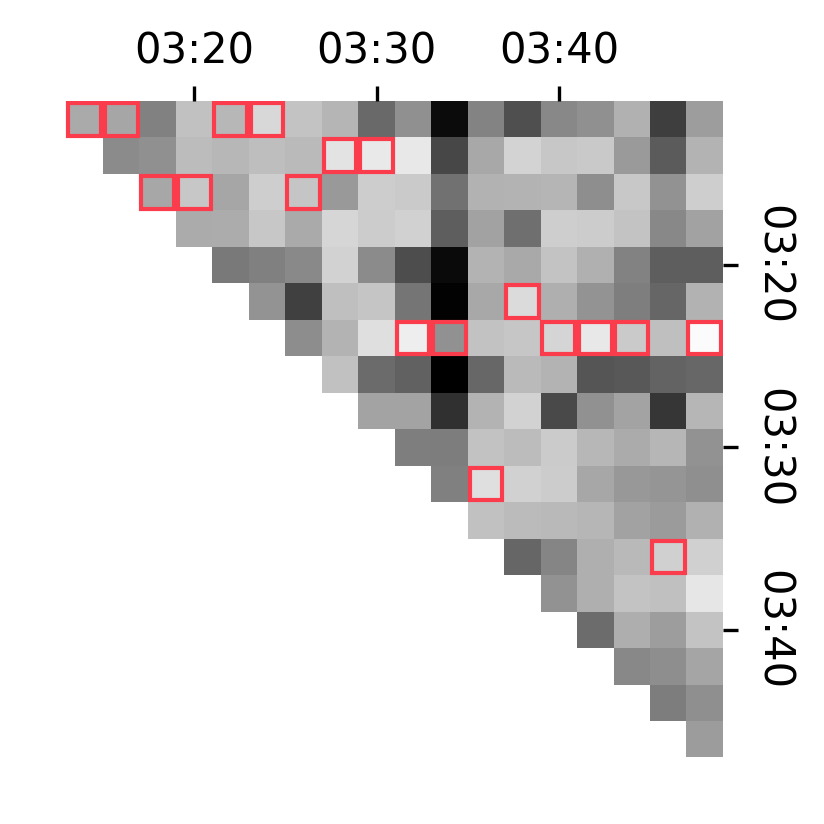

In [2]:
import matplotlib.patches as patches
plt.style.use('default')

def get_timeformat(seconds):
    m, s = divmod(seconds, 60)
    string = f'{m:02d}:{s:02d}'
    return string

fig, axes = plt.subplots(1,1,figsize=(3,3), dpi=300)
axes.imshow(BERT_NSP_matrix_wo_similarity_for_plotting, cmap='gray', vmin=-3, vmax=1.5)
for i in range(97, 115):
    max_idx = np.argmax(BERT_NSP_matrix_wo_similarity_for_plotting[96:i,i]) + 96
    print(i, max_idx)
    rect = patches.Rectangle((i-0.45, max_idx-0.45), 0.9, 0.9, linewidth=1.0, edgecolor='#fa3c4c', facecolor='none')
    axes.add_patch(rect)
axes.set_xticks([100, 105, 110])
axes.set_yticks([100, 105, 110])
axes.set_xticklabels([get_timeformat(i*2) for i in [100, 105, 110]])
axes.set_yticklabels([get_timeformat(i*2) for i in [100, 105, 110]], rotation=270, va='center')
axes.set_xlim(95.5,114.5)
axes.set_ylim(114.5,95.5)
axes.xaxis.tick_top()
axes.yaxis.tick_right()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['bottom'].set_visible(False)
axes.spines['left'].set_visible(False)

In [4]:
def get_BERT_moments(n):
    BERT_moments = np.zeros(610)
    for i in np.argsort(BERT_retrieval)[::-1][:n]:
        BERT_moments[i] = 1
    return BERT_moments


BERT_50 = get_BERT_moments(50)

import pickle
with open('../utils/movie/backward_retrieval_related.pkl', 'rb') as f:
    backward_retrieval_related = pickle.load(f)
with open('../utils/movie/backward_retrieval_unrelated.pkl', 'rb') as f:
    backward_retrieval_unrelated = pickle.load(f)

with open('../utils/movie/forward_retrieval_related.pkl', 'rb') as f:
    forward_retrieval_related = pickle.load(f)
with open('../utils/movie/forward_retrieval_unrelated.pkl', 'rb') as f:
    forward_retrieval_unrelated = pickle.load(f)

retrieval_moments = np.zeros(610)
for pair in forward_retrieval_related:
    retrieval_moments[pair[1]+3:pair[1]+7] = 1

for pair in backward_retrieval_related:
    retrieval_moments[pair[1]-8:pair[1]-2] = 1


In [27]:
subjects =  ['sub-EZ9NM','sub-TV7EF','sub-WLC4O','sub-3L109','sub-3UYSS','sub-JVPPA','sub-EDOP8',
             'sub-TIJD1','sub-AYDLR','sub-98UT7','sub-4G9A5','sub-YJBI8','sub-FG8PD','sub-BBN4K',
             'sub-F61IR','sub-M1ZRL','sub-NZJZN','sub-XZ9SS','sub-L05R3','sub-ZOVPY','sub-6PEOF',
             'sub-G6RPG','sub-TPNCU','sub-9ADGJ','sub-27IXQ','sub-NDX5S','sub-OE7EZ','sub-28E84',
             'sub-ENN9N','sub-28OBV','sub-8WJAP','sub-SPHBN','sub-WP8SX','sub-BG4CW','sub-AVQEZ',
             'sub-YLWD1','sub-0A4MV','sub-8PIML','sub-4T7NM','sub-X5RE0','sub-RUQON','sub-JVT46',
             'sub-RTFX9','sub-OWWAF','sub-IC2KG','sub-S3I4J','sub-XFQA1','sub-UKF5L','sub-Z0MJJ',
             'sub-9HMVR','sub-DBQ8H','sub-NAD3W','sub-KH33B','sub-JASQ6','sub-T6FHZ','sub-PQ8JD',
             'sub-NOVID','sub-XAKBX','sub-JVSIQ','sub-D1FKN','sub-R3JA3','sub-GPMCX','sub-H8QL5',
             'sub-6HW3V','sub-WF939']

hippocampal_timeseries = np.load(f'../Figure_5/data/hippocampal_timeseries.npy')
cortical_timeseries = np.load(f'../Figure_5/data/cortical_timeseries.npy', allow_pickle=True)

content_score = np.load("../Figure_3/data/content_score.npy")
ordering_score = np.load("../Figure_3/data/ordering_score.npy")

In [28]:
def get_BERT_moments(n):
    BERT_moments = np.zeros(610)
    for i in np.argsort(BERT_retrieval)[::-1][:n]:
        BERT_moments[i] = 1
    return BERT_moments

times = [get_BERT_moments(10),
         get_BERT_moments(20),
         get_BERT_moments(30),
         get_BERT_moments(40),
         get_BERT_moments(50),
         get_BERT_moments(60),
         get_BERT_moments(70),
         get_BERT_moments(80),
         get_BERT_moments(90),
         get_BERT_moments(100),
         ]

Schaefer_atlas_parcel = [100,200,300,400,500,600,700,800,900,1000]
#Schaefer_atlas_parcel = [100,200] #,300,400,500,600,700,800,900,1000]
save = False
if save:
    hippocampal_FC = []
    for nr, num_rois in enumerate(Schaefer_atlas_parcel):
        print(num_rois)
        tmp_hippocampal_FC = np.zeros((len(subjects), num_rois, len(times)))
        for i, fname in enumerate(subjects):
            for t, time in enumerate(times):
                for r in range(num_rois):
                    tmp_hippocampal_FC[i,r,t] = pearsonr(hippocampal_timeseries[i,time==1], cortical_timeseries[i,nr][time==1, r])[0]
        hippocampal_FC.append(tmp_hippocampal_FC)
    print('done!')

    with open('data/BERT_hippocampal_FC.pkl', 'wb') as f:
        pickle.dump(hippocampal_FC, f)
else:
    with open('data/BERT_hippocampal_FC.pkl', 'rb') as f:
        hippocampal_FC = pickle.load(f)

In [29]:
from multiprocessing import Pool
selection_threshold = 0.05
def get_LOO_prediction(test_idx):
    test_sub = np.eye(65)[test_idx]==1
    train_subs =  np.eye(65)[test_idx]==0
    positive_edges = []
    negative_edges = []
    for edge in range(num_edges):
        brain_vector = FC[train_subs, edge]
        behav_vector = behavioral_score[train_subs]
        r, p = pearsonr(brain_vector, behav_vector)
        if p < selection_threshold:
            if r >= 0:
                positive_edges.append(edge)
            elif r < 0:
                negative_edges.append(edge)
    positive_edges = np.array(positive_edges)
    negative_edges = np.array(negative_edges)
    if len(positive_edges)>0:
        positive_train = np.sum(FC[train_subs,:][:,positive_edges], axis=1)
        positive_test = np.sum(FC[test_sub,:][:,positive_edges], axis=1)
    else:
        positive_train = np.zeros(64)
        positive_test = np.zeros(1)
    if len(negative_edges)>0:
        negative_train = np.sum(FC[train_subs,:][:,negative_edges], axis=1)
        negative_test = np.sum(FC[test_sub,:][:,negative_edges], axis=1)
    else:
        negative_train = np.zeros(64)
        negative_test = np.zeros(1)
    X_train = np.vstack([positive_train, negative_train]).T
    X_test = np.vstack([positive_test, negative_test]).T
    y_train = behavioral_score[train_subs]
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)[0]
    return y_pred

save = False
if save:
    model_predictivity = np.zeros((len(Schaefer_atlas_parcel), 2, len(times)))
    for nr, num_rois in enumerate(Schaefer_atlas_parcel):
        num_edges = num_rois
        for b, behavioral_score in enumerate([ordering_score, content_score]):
            if b == 0:
                name='ordering'
            else:
                name='content'
            predictivity_r = []
            for t, time in enumerate(times):
                FC  = hippocampal_FC[nr][:,:,t]
                FC = np.arctanh(FC)
                with Pool() as pool:
                    behavioral_prediction = pool.map(get_LOO_prediction, [i for i in np.arange(len(subjects))])
                r, p = pearsonr(behavioral_prediction, behavioral_score)
                predictivity_r.append(r)
                model_predictivity[nr, b, t] = r
            print(num_rois, name, predictivity_r)
    np.save('data/BERT_based_model_predictivity.npy', model_predictivity)
else:
    model_predictivity = np.load('data/BERT_based_model_predictivity.npy')

In [46]:
from multiprocessing import Pool
import pickle

selection_threshold = 0.05
def get_LOO_prediction_edges(test_idx):
    test_sub = np.eye(65)[test_idx]==1
    train_subs =  np.eye(65)[test_idx]==0
    positive_edges = []
    negative_edges = []
    for edge in range(num_edges):
        brain_vector = FC[train_subs, edge]
        behav_vector = behavioral_score[train_subs]
        r, p = pearsonr(brain_vector, behav_vector)
        if p < selection_threshold:
            if r >= 0:
                positive_edges.append(edge)
            elif r < 0:
                negative_edges.append(edge)
    positive_edges = np.array(positive_edges)
    negative_edges = np.array(negative_edges)
    return [positive_edges, negative_edges]

with open('data/BERT_hippocampal_FC.pkl', 'rb') as f:
    hippocampal_FC = pickle.load(f)

num_rois = 500
num_edges = num_rois
model_edges = np.zeros(2, dtype='object')
for b, behavioral_score in enumerate([ordering_score, content_score]):
    if b == 0:
        name='ordering'
    else:
        name='content'

    FC  = hippocampal_FC[4][:,:,4] #200 ROIs and Top 50 moments
    FC  = np.arctanh(FC)
    with Pool() as pool:
        edges = pool.map(get_LOO_prediction_edges, [i for i in np.arange(len(subjects))])
    model_edges[b] = edges

model_positive_edges = np.zeros((2,num_rois))
model_negative_edges = np.zeros((2,num_rois))
for b, behavioral_score in enumerate([ordering_score, content_score]):
    for s, subject in enumerate(subjects):
        if len(model_edges[b][s][0]) > 0:
            model_positive_edges[b,model_edges[b][s][0]] += 1
        if len(model_edges[b][s][1]) > 0:
            model_negative_edges[b,model_edges[b][s][1]] += 1
model_positive_edges /= len(subjects)
model_negative_edges /= len(subjects)

np.save(f'data/BERT_based_model_positive_edges_{num_rois}_alt.npy', model_positive_edges)
np.save(f'data/BERT_based_model_negative_edges_{num_rois}_alt.npy', model_negative_edges)